In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image
from glob import glob

# Loading the data

In [2]:
ham=pd.read_csv(os.path.join('/kaggle/input/skin-cancer-mnist-ham10000','HAM10000_metadata.csv'))
ham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [3]:
#Get folder path
base_skin_dir = os.path.join('..', 'input')

# loop into folder and loop all the images of the folder
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir,"skin-cancer-mnist-ham10000/", '*', '*.jpg'))}

In [4]:
# Adding cell_type and image_path columns 
ham['path'] = ham['image_id'].map(imageid_path_dict.get)
# Adding image pixels
# Reshape image with 7 x 7
ham['image_pixel'] = ham['path'].map(lambda x: np.asarray(Image.open(x).resize((7,7))).flatten())

In [5]:
#Check on ham dataframe
ham

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_pixel
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[201, 157, 189, 213, 170, 201, 217, 175, 201, ..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[128, 97, 125, 185, 138, 166, 210, 167, 203, 2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[204, 146, 162, 212, 149, 161, 218, 159, 180, ..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[148, 105, 120, 201, 144, 158, 210, 149, 157, ..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[208, 160, 192, 226, 180, 208, 222, 184, 206, ..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[207, 187, 202, 210, 185, 195, 214, 183, 187, ..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[116, 100, 100, 164, 140, 142, 195, 166, 169, ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[183, 165, 170, 211, 188, 195, 235, 212, 218, ..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[168, 126, 144, 181, 138, 158, 186, 140, 154, ..."


In [6]:
# Create image dataframe to store all the pixel columns
# Extract the value from image_pixe' then split the values into columns
arr = np.array(ham['image_pixel'].values.tolist())
df = pd.DataFrame(columns=['c'+str(i) for i in range(147)])  # range is 7 x 7 x 3
df[df.columns] = arr
df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c137,c138,c139,c140,c141,c142,c143,c144,c145,c146
0,201,157,189,213,170,201,217,175,201,214,...,192,212,163,185,204,162,182,186,144,167
1,128,97,125,185,138,166,210,167,203,216,...,195,213,178,197,186,138,151,94,68,77
2,204,146,162,212,149,161,218,159,180,210,...,190,219,169,184,202,153,173,182,141,162
3,148,105,120,201,144,158,210,149,157,212,...,154,187,143,156,162,129,146,75,54,63
4,208,160,192,226,180,208,222,184,206,207,...,203,239,195,217,234,184,211,215,182,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,207,187,202,210,185,195,214,183,187,217,...,185,223,194,197,223,202,206,209,187,189
10011,116,100,100,164,140,142,195,166,169,211,...,179,205,177,177,183,159,157,115,98,95
10012,183,165,170,211,188,195,235,212,218,243,...,208,242,217,216,229,206,205,202,181,176
10013,168,126,144,181,138,158,186,140,154,190,...,175,195,176,187,192,171,181,187,159,170


In [7]:
# Concat two table as ground_truth
ground_truth = pd.concat([ham, df], axis=1)

In [8]:
# Create label mapping on dx column
label_mapping = { 
    'nv':0,     
    'mel':1,  
    'bkl':2,  
    'bcc':3,
    'akiec':4,  
    'vasc':5, 
    'df':6
}

# Create label column based on dx column
ground_truth['label'] = ground_truth['dx'].map(label_mapping)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [9]:
ground_truth.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_pixel,c0,...,c138,c139,c140,c141,c142,c143,c144,c145,c146,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[201, 157, 189, 213, 170, 201, 217, 175, 201, ...",201,...,212,163,185,204,162,182,186,144,167,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[128, 97, 125, 185, 138, 166, 210, 167, 203, 2...",128,...,213,178,197,186,138,151,94,68,77,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[204, 146, 162, 212, 149, 161, 218, 159, 180, ...",204,...,219,169,184,202,153,173,182,141,162,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[148, 105, 120, 201, 144, 158, 210, 149, 157, ...",148,...,187,143,156,162,129,146,75,54,63,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[208, 160, 192, 226, 180, 208, 222, 184, 206, ...",208,...,239,195,217,234,184,211,215,182,196,2


# Descriptive Analysis

There are seven features in the dataset.
* Lession ID   - Unique ID of Lession
* Image ID     - Unique ID of the image
* DX           - DX
* DX Type      - DX Type
* Age          - Age of the Patient
* Sex          - Gender of the Patient
* Localization - location of the dermatological images

In [10]:
#Pre-screen the first few observations of the dataset
ham.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_pixel
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[201, 157, 189, 213, 170, 201, 217, 175, 201, ..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[128, 97, 125, 185, 138, 166, 210, 167, 203, 2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[204, 146, 162, 212, 149, 161, 218, 159, 180, ..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[148, 105, 120, 201, 144, 158, 210, 149, 157, ..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[208, 160, 192, 226, 180, 208, 222, 184, 206, ..."


## Perform Null checking on the dataset

Perform NA and Null checking

In [11]:
#NA Check
ham.isna().isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
path            0
image_pixel     0
dtype: int64

There is 53 records missing in age feature which around 0.6% of the total observations, since age is the only missing value while other features do not have missing.

Therefore we can use mean value to replace the missing value.

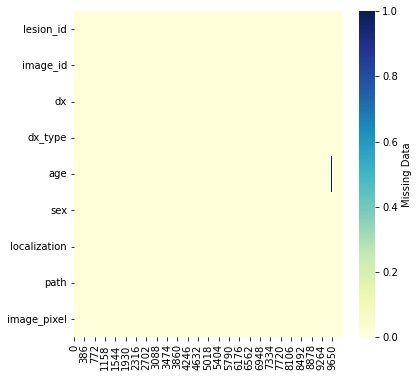

In [12]:
## Null Checking
plt.figure(figsize=(6,6))
sns.heatmap(ham.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("Missing data check on HAM10000.png", dpi=100)

# Handling missing values - replaced by mean
ham['age'].fillna(value=int(ham['age'].mean()), inplace=True)

## Export the dataset

In [13]:
#Export the file into CSV
ground_truth.to_csv(r'GroupTruth.csv')

## Summary of the dataset

Using the describe function, we have table below. The first column meaning as below: 
* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation.
* min - the minimum value.
* 25% - The 25% percentile*.
* 50% - The 50% percentile*.
* 75% - The 75% percentile*.
* max - the maximum value.

Since Age is numerical variable, therefore describe function can provide standard deviation, percentile, min and max information.

In [14]:
#Describe the dataset with all columns
ground_truth.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_pixel,c0,...,c138,c139,c140,c141,c142,c143,c144,c145,c146,label
count,10015,10015,10015,10015,9958.000000,10015,10015,10015,10015,10015.000000,...,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
unique,7470,10015,7,4,NaN,3,15,10015,10015,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,HAM_0003789,ISIC_0027419,nv,histo,NaN,male,back,../input/skin-cancer-mnist-ham10000/ham10000_i...,"[201, 157, 189, 213, 170, 201, 217, 175, 201, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,1,6705,5340,NaN,5406,2192,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN,NaN,NaN,193.232851,...,203.068997,152.011083,158.927708,199.640040,150.819371,157.437743,187.010285,140.569945,146.313929,0.754968
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN,NaN,NaN,43.865927,...,25.759464,26.851934,30.279791,28.712728,26.284334,29.609915,41.623976,33.953058,36.911300,1.316223
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,...,3.000000,2.000000,3.000000,8.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,171.000000,...,185.000000,136.000000,140.000000,181.000000,134.000000,138.000000,167.000000,124.000000,127.000000,0.000000
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,203.000000,...,206.000000,152.000000,160.000000,204.000000,151.000000,157.000000,198.000000,145.000000,149.000000,0.000000
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,225.000000,...,222.000000,169.000000,178.000000,221.000000,167.000000,176.000000,216.000000,161.000000,169.000000,1.000000


## Distribustion of Age

Reading the distribution of age group is show normally distributed graph, which saying majority of the observations are from the age 40 - 55.
Other indicators can be found:
* An upward trend after age 20.
* A downward trend after age 55.

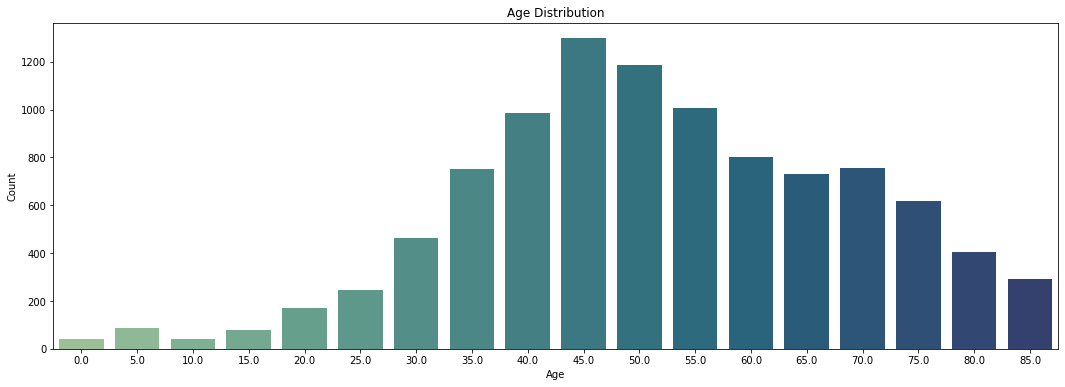

In [15]:
#Then plot the graph for visualisation
plt.figure(figsize=(18,6))
plot1 = sns.countplot(data = ground_truth,x='age',palette="crest") 
plot1.set_xlabel('Age')
plot1.set_ylabel('Count')

plt.title('Age Distribution');

# Skin Lesion Class

There are seven classification on cancerous types in the dataset, they are:
* Actinic Keratosis (AKIEC)
* Basal Cell Carcinoma (BCC) 
* Benign Keratosis (BKL)
* Dermatofibroma (DF)
* Melanoma (MEL)
* Melanomic Neves (NV)
* Vascular Lesion (VASC) 

When we try to explore the combination of classification with dx_type or patient's gender, we can see the dataset is imbalance (the majorities of contributions are from nv class). For examples, dx_type is follow up, only has nv class observations and no others classes.

In [16]:
print(ground_truth.dx.value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


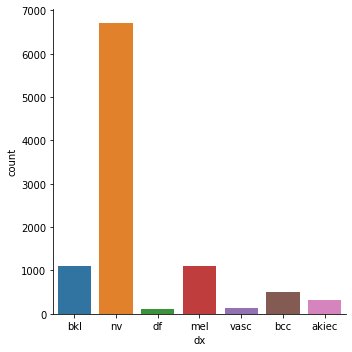

In [17]:
# We count the data by output class DX
sns.catplot(x="dx",
            kind="count",
            data=ground_truth)

### Image collection channel
In this section, we exploring the data collection type to identified the source of the image is from which channel. 
As per graph below, we can see the majority of image collection is from histo. Image collection from other channels are not that much.

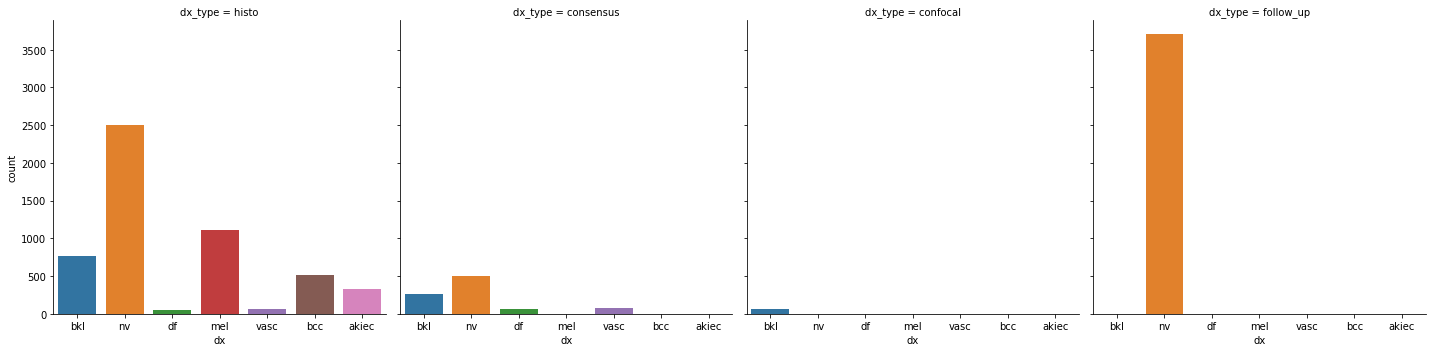

In [18]:
# We count the data by output class DX and DX_TYPE
sns.catplot(x="dx",
            col="dx_type",
            kind="count",
            data=ham)

### Gender and Cancer

Distribution of gender is quite nice, the proportion of distribution across male and female are not much difference.

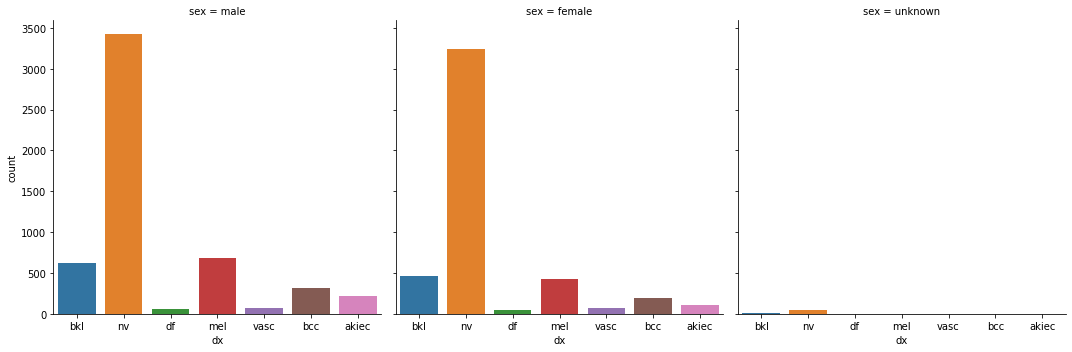

In [19]:
# We count the data by output class DX and Gender
sns.catplot(x="dx",
            col="sex",
            kind="count",
            data=ground_truth)

array([[<AxesSubplot:title={'center':'akiec'}>,
        <AxesSubplot:title={'center':'bcc'}>,
        <AxesSubplot:title={'center':'bkl'}>],
       [<AxesSubplot:title={'center':'df'}>,
        <AxesSubplot:title={'center':'mel'}>,
        <AxesSubplot:title={'center':'nv'}>],
       [<AxesSubplot:title={'center':'vasc'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

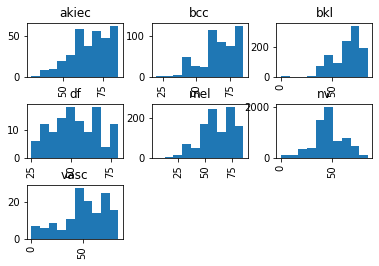

In [20]:
#Age distribution on difference dx group
ground_truth.age.hist(by=ground_truth.dx)

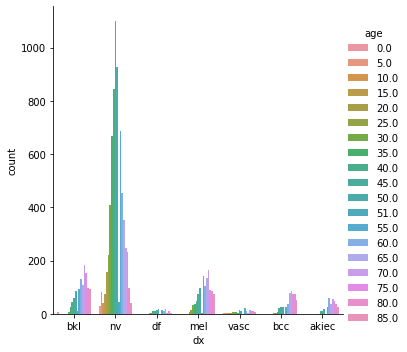

In [21]:
# We count the data by output class DX and Age
sns.catplot(x="dx",
            hue="age",
            kind="count",
            data=ham)

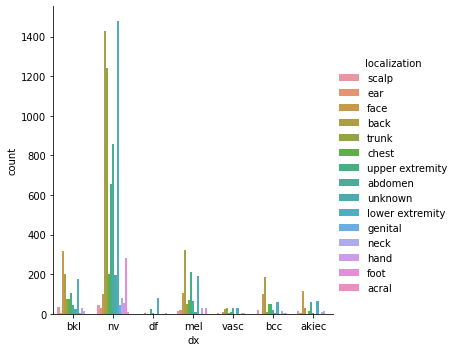

In [22]:
# We count the data by output class DX and Age
sns.catplot(x="dx", 
            hue="localization",
            kind="count",
            data=ham)

# Protential Problem when clustering
There is a potential problems on clustering with this dataset, since clustering is measure by distance between samples within a certain maximum.
In this dataset, 'nv' is a large and unequally scatteer class when applying k-means, other not-so-prominent clusters may be not be found. In other word, clustering is quite difficult on this dataset.